In [81]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from qiskit import *
from qiskit.visualization import plot_histogram
np.set_printoptions(threshold=sys.maxsize)

In [88]:
def bipartiteWalk(N,qc,qreg,qcoin):
    qc.x(qreg[N-1])
    qc.swap(qreg[:-1],qcoin)
    

def hadamardCoin(N,qc,qcoin):
    qc.h(qcoin)
    return qc

def grover3Coin(N,qc,qcoin):
    hadamardCoin(N,qc,qcoin)
    qc.u1(np.pi,qcoin[0])
    qc.u2(np.pi,np.pi,qcoin[2])
    qc.ccx(qcoin[0],qcoin[1],qcoin[2])
    qc.u2(2*np.pi,0,qcoin[2])
    hadamardCoin(N,qc,qcoin)
    qc.barrier()
    return qc

def groverOracle(N,qc,qcoin):
    qc.u1(np.pi,qcoin[0])
    qc.u2(np.pi,np.pi,qcoin[2])
    qc.ccx(qcoin[0],qcoin[1],qcoin[2])
    qc.u2(2*np.pi,0,qcoin[2])
    qc.barrier()
    return qc


def runWalk(N,qc,qreg,qcoin,creg,steps):
    for i in range(steps):
        #groverOracle(N,qc,qcoin)
        grover3Coin(n,qc,qcoin)
        bipartiteWalk(N,qc,qreg,qcoin)
        qc.barrier()
        qc.measure(qreg,creg)

        qc.barrier()

    return qc

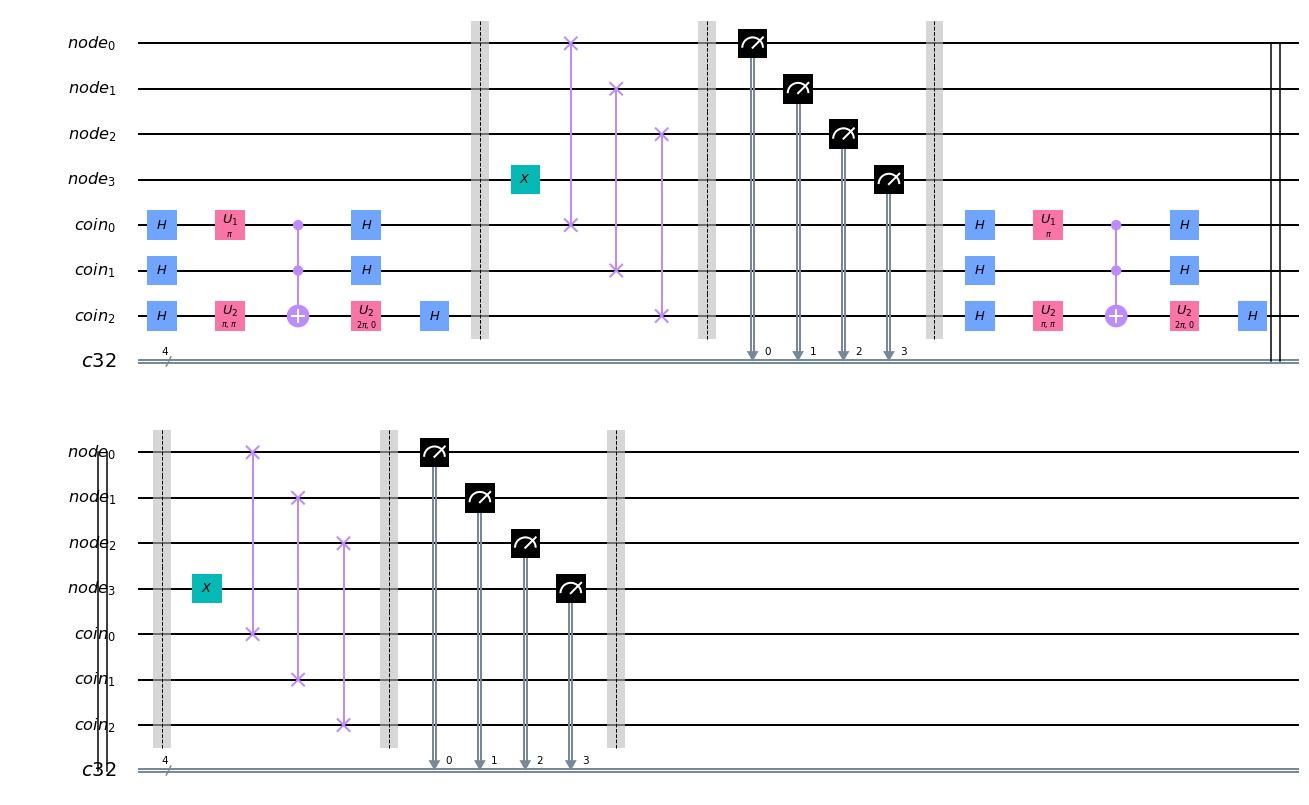

In [95]:
n=4
#qb = QuantumRegister(1,'b')
qreg = QuantumRegister(n,'node')
qcoin = QuantumRegister(n-1,'coin')
creg = ClassicalRegister(n)

qc= QuantumCircuit(qreg,qcoin,creg)
#qc.h(qreg)
steps = 2


qc=runWalk(n,qc,qreg,qcoin,creg,steps)

#qc.h(qreg)

qc.draw(output='mpl')
#print(qreg[0:n-1])

In [96]:
#UnitarySimulator.run(qc)

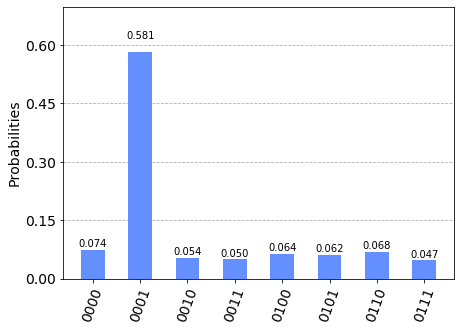

In [97]:
circ1 = qc
#circuit building
backend = Aer.get_backend('qasm_simulator')




job_sim = execute(circ1, backend=backend,shots=1000)
result_sim = job_sim.result()

#print(result_sim.get_unitary(circ1, decimals=2))
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)

In [ ]:
qreg1 = QuantumRegister(2)
creg1 = ClassicalRegister(2)
qc1 = QuantumCircuit(qreg1,creg1)

qc1.x(qreg1[0])
qc1.measure(qreg1[0],creg1[0])
qc1.measure(qreg1[1],creg1[1])


qc1.draw(output='mpl')


In [ ]:
circ1 = qc1
#circuit building
backend = Aer.get_backend('qasm_simulator')

job_sim = execute(circ1, backend=backend, shots=8192,)
#result = job.result()
result_sim = job_sim.result()
result_counts = result_sim.get_counts(circ1)
plot_histogram(result_counts)